<a href="https://colab.research.google.com/github/ArtemBurenok/Machine_Learning_Course/blob/main/Classification_bigger_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Для анализа были взяты данные кредитного скоринга. Целевая переменная - колонка STATUS в таблице CreditRecord. Это многоклассовая переменная, однако задача будет сведена к бинарной классификации.

In [ ]:
CreditRecord = pd.read_csv('/content/drive/MyDrive/credit_record.csv')
appRecord = pd.read_csv('/content/drive/MyDrive/application_record.csv')

In [ ]:
CreditRecord.shape, appRecord.shape

((1048575, 3), (438557, 18))

In [ ]:
CreditRecord.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
appRecord.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Первичный анализ

In [ ]:
CreditRecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
appRecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Для начала, посмотрим на уникальные значения столбцов.

In [ ]:
bar_group = []

for column in appRecord.columns:
    if column != 'AMT_INCOME_TOTAL':
        if len(pd.unique(appRecord[column])) < 30 :
            bar_group.append(column)
            print(pd.unique(appRecord[column]))

['M' 'F']
['Y' 'N']
['Y' 'N']
[ 0  1  3  2  4  5 14 19  7  9 12  6]
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
[1]
[1 0]
[0 1]
[0 1]
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
[ 2.  1.  5.  3.  4.  6. 15.  7. 20.  9. 11. 14.  8.]


Посмотрим на уникальные значения целевой переменной.

In [ ]:
CreditRecord['STATUS'].value_counts()

,count
STATUS,
C,442031
0,383120
X,209230
1,11090
5,1693
2,868
3,320
4,223


In [ ]:
# количество пропущенных значений
appRecord.isna().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


Сделаем первичный анализ.

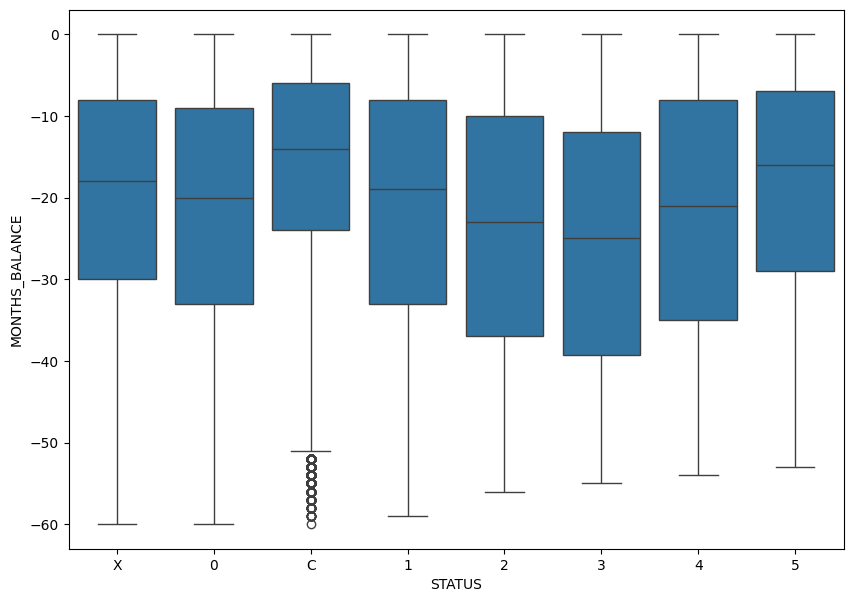

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=CreditRecord['STATUS'], y=CreditRecord['MONTHS_BALANCE']);

In [ ]:
len(bar_group)

14

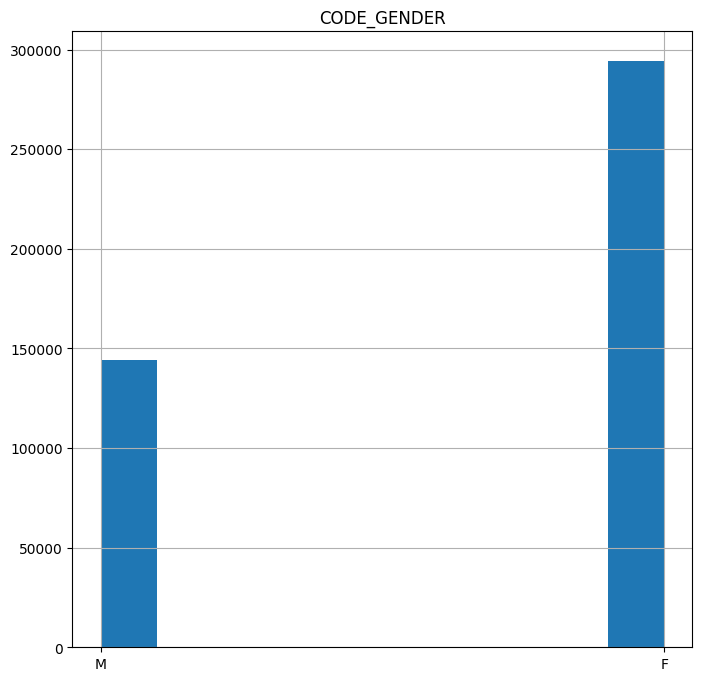

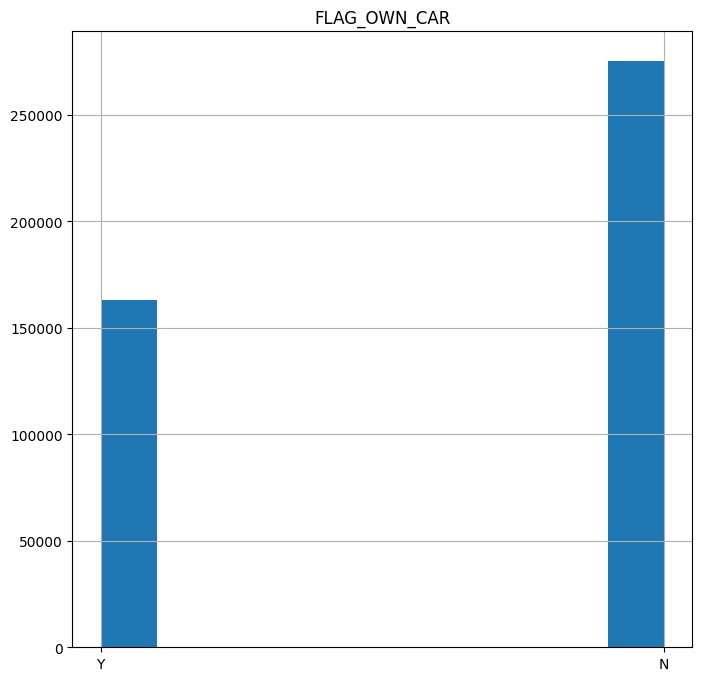

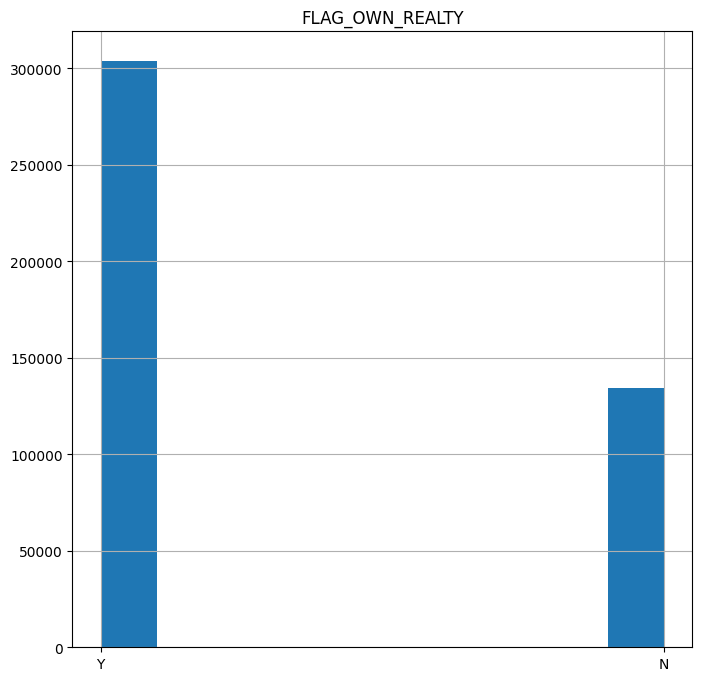

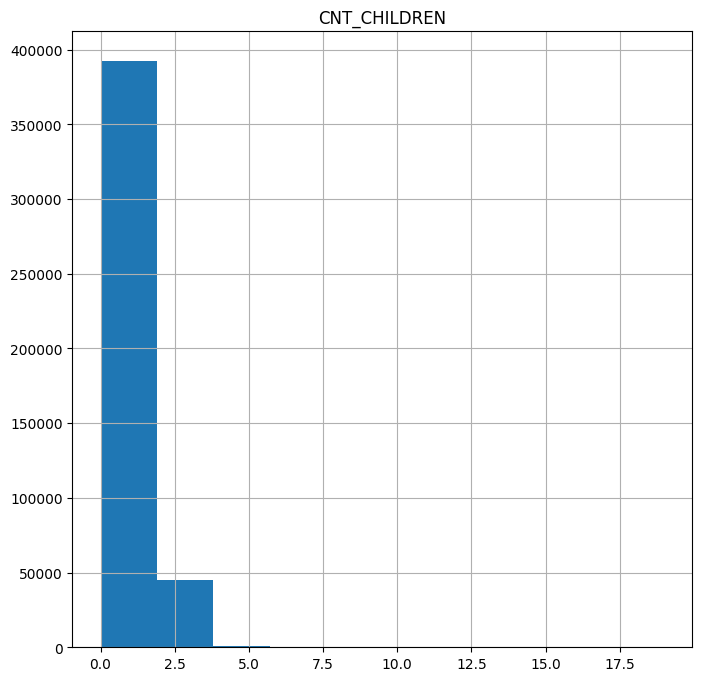

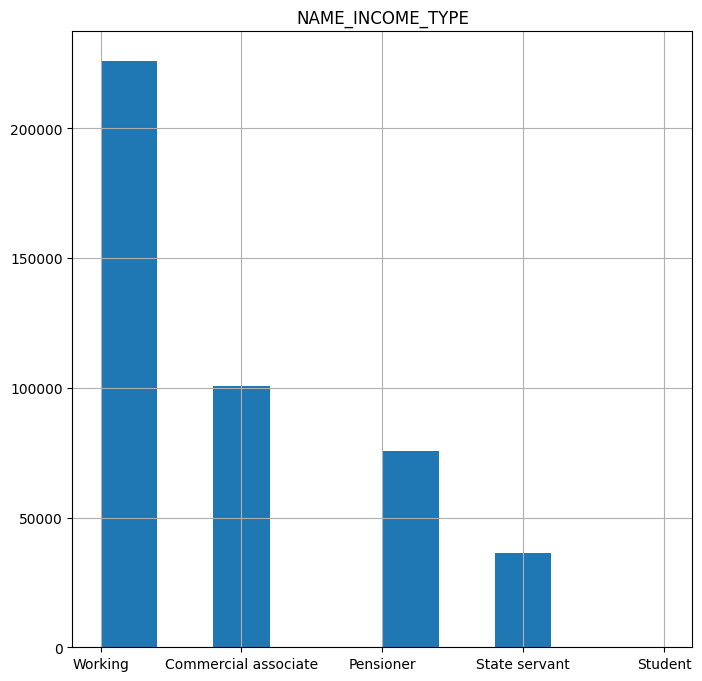

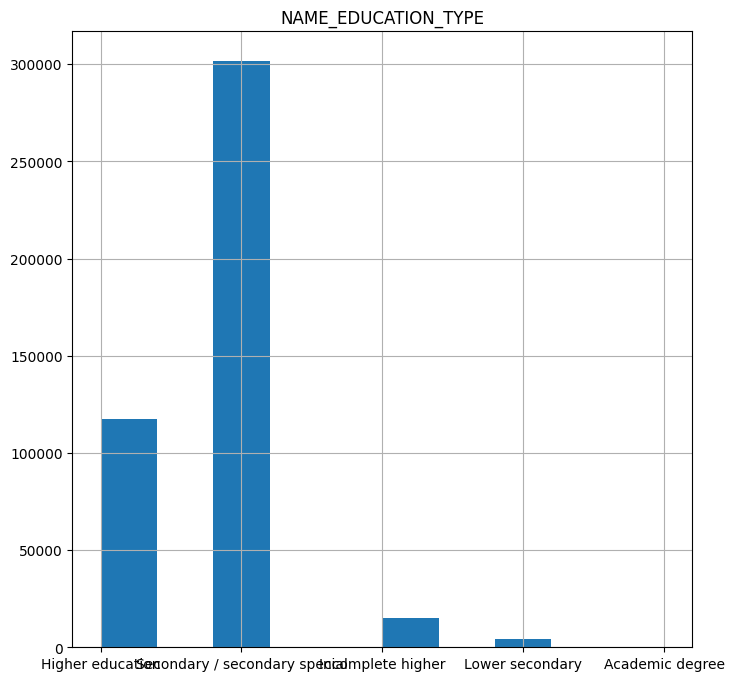

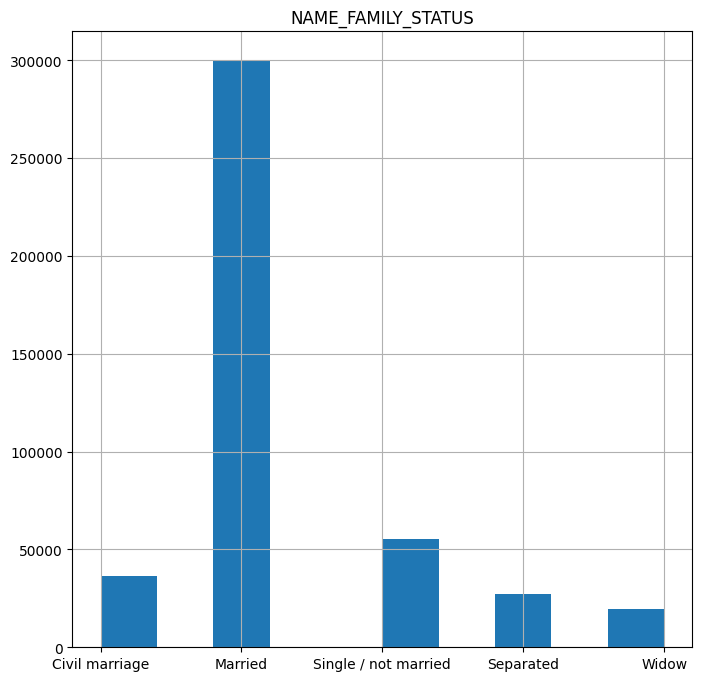

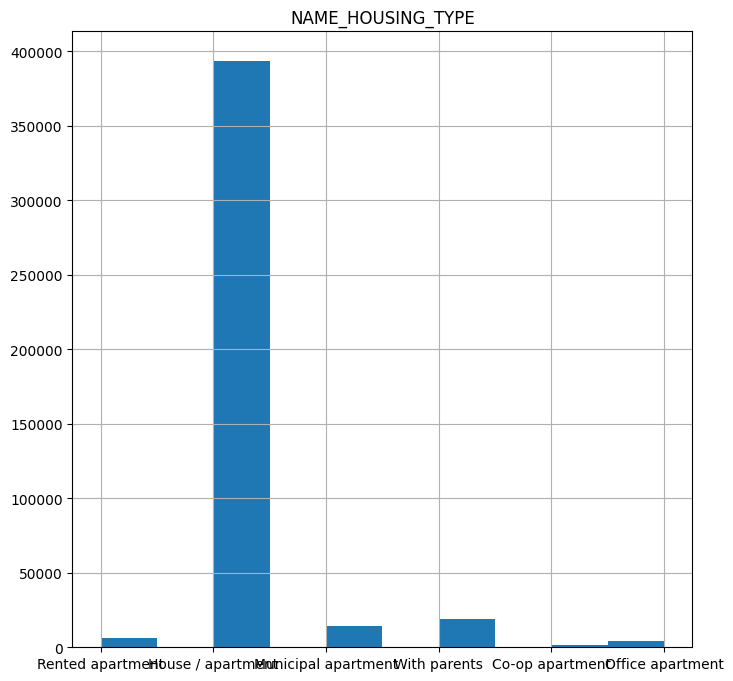

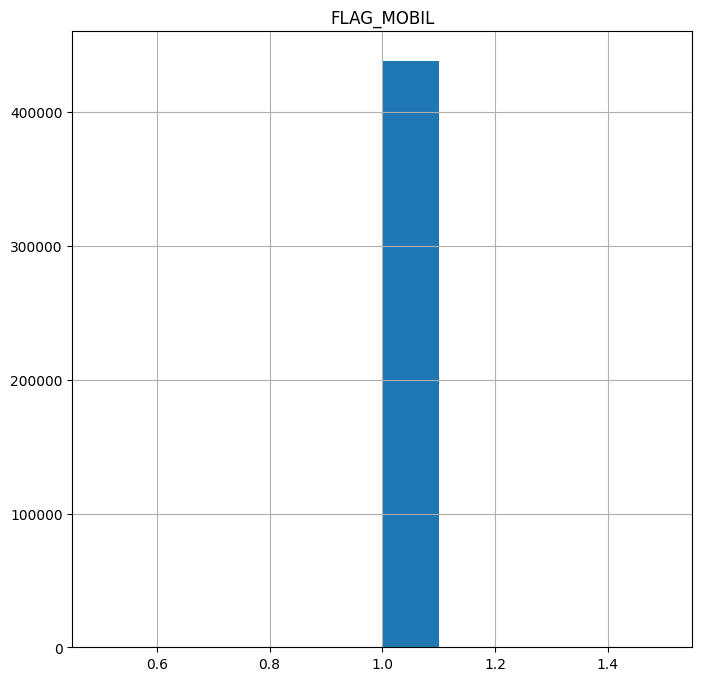

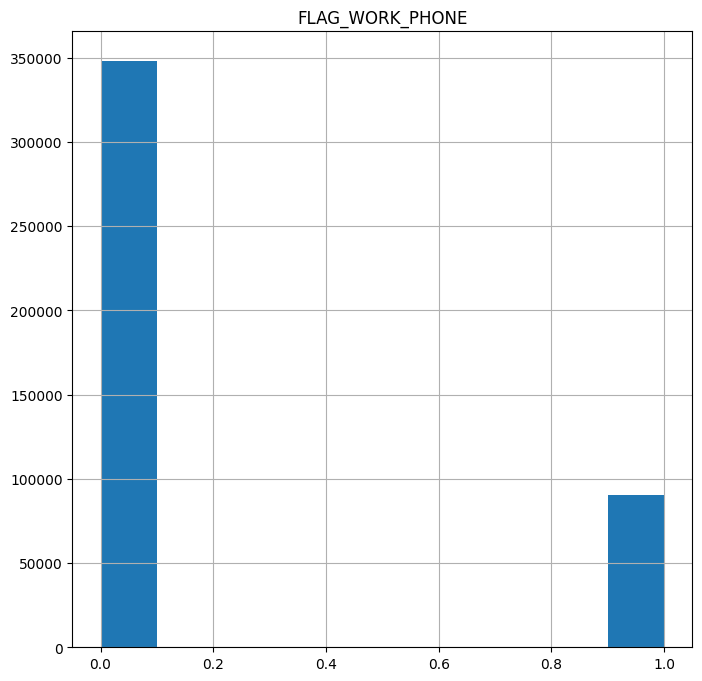

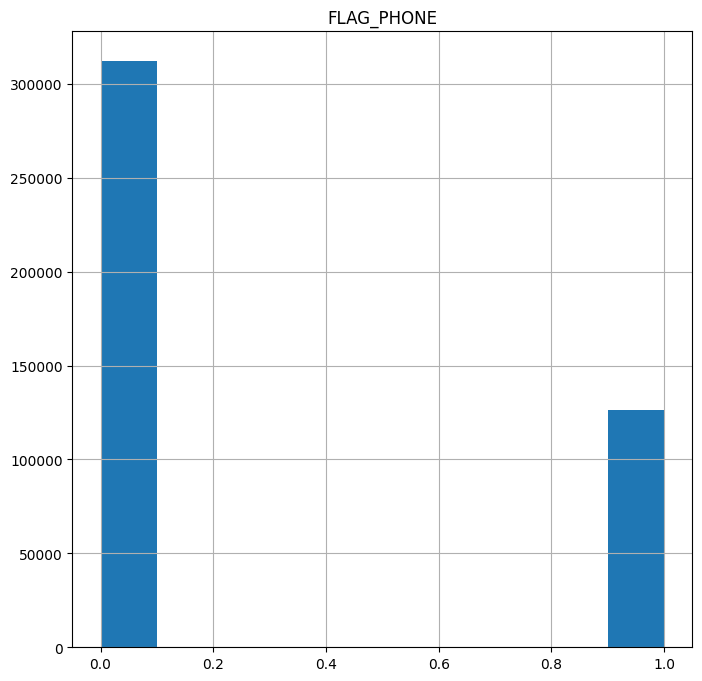

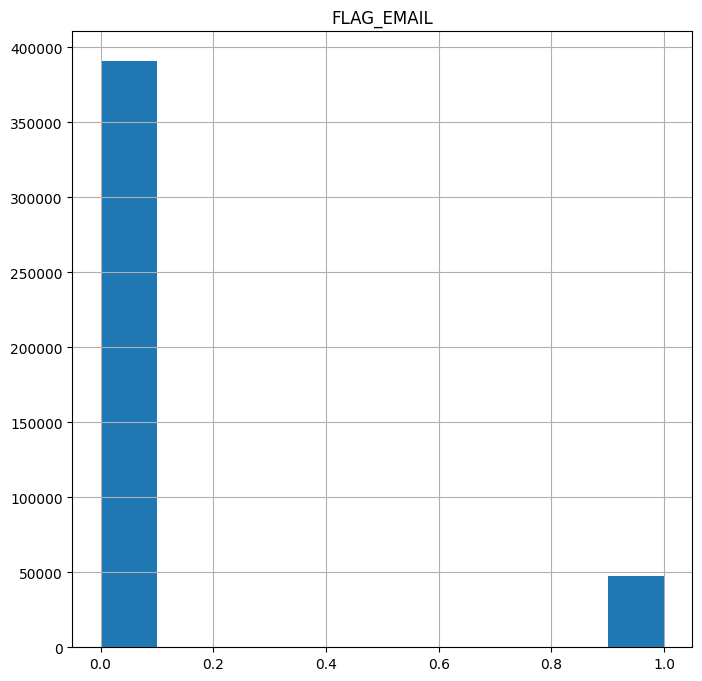

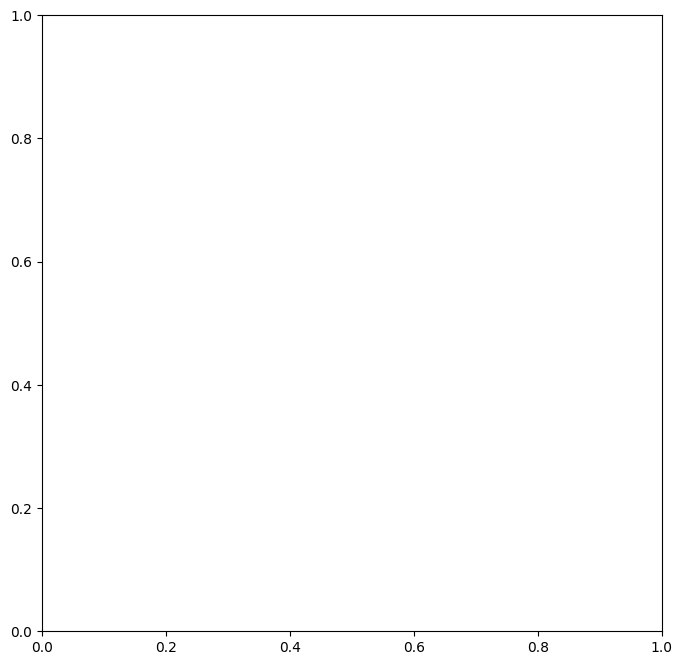

In [ ]:
for i in range(len(bar_group) - 1):
    try:
        plt.figure(figsize=(8, 8))
        plt.hist(appRecord[bar_group[i]])
        plt.title(bar_group[i])
        plt.grid()
        plt.show()
    except TypeError:
        continue

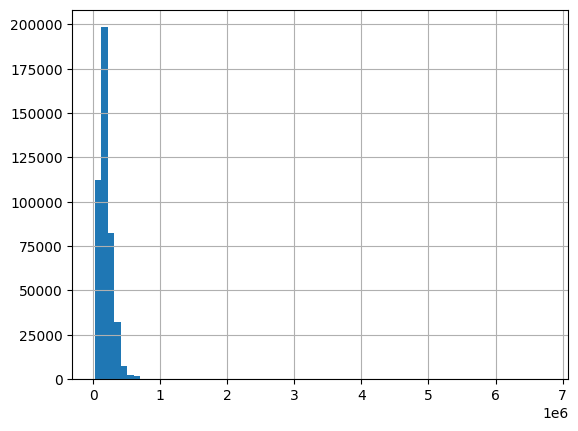

In [ ]:
plt.hist(appRecord['AMT_INCOME_TOTAL'], bins=70)
plt.grid()
plt.show()

Выполним преобразование данных: Label Encoding, вставить пропущенные значения, привести целевую переменную к бинарному виду и соединить таблицы.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

objectColumns = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]

for objColumn in objectColumns:
    label = LabelEncoder()
    appRecord[objColumn] = label.fit_transform(appRecord[objColumn].values)

In [ ]:
Ocupation_dict = {
    'Security staff':0, 'Sales staff':1,
    'Accountants':2, 'Laborers':3,
    'Managers':4,'Drivers':5,
    'Core staff':6, 'High skill tech staff':7,
    'Cleaning staff':8,'Private service staff':9,
    'Cooking staff':10, 'Low-skill Laborers':11,
    'Medicine staff':12, 'Secretaries':13,
    'Waiters/barmen staff':14, 'HR staff':15,
    'Realty agents':16, "IT staff":17
}

appRecord['OCCUPATION_TYPE'] = appRecord['OCCUPATION_TYPE'].map(Ocupation_dict)

In [ ]:
appRecord.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True, axis=1)

In [ ]:
# делаем целевую переменную бинарной

map_status = {
    'C' : 1, 'X' : 1, '0' : 1, '1' : 0,
    '2' : 0, '3' : 0, '4' : 0, '5' : 0
}

CreditRecord["STATUS"] = CreditRecord['STATUS'].map(map_status)

In [ ]:
CreditRecord['STATUS'].value_counts()

,count
STATUS,
1,1034381
0,14194


In [ ]:
df_credit = appRecord.merge(CreditRecord, how='inner', on=['ID'])
df_credit.drop('ID', axis=1, inplace=True)
df_credit.head(6)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,0,1
1,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-1,1
2,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-2,1
3,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-3,1
4,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-4,1
5,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-5,1


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_credit_imputer = imputer.fit_transform(df_credit.values)

Уберём ненужные признаки

In [ ]:
X_data = pd.DataFrame(df_credit_imputer, columns=df_credit.columns)
X_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,1.0,1.0,1.0,0.0,427500.0,4.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,3.0,2.0,0.0,1.0
1,1.0,1.0,1.0,0.0,427500.0,4.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,3.0,2.0,-1.0,1.0
2,1.0,1.0,1.0,0.0,427500.0,4.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,3.0,2.0,-2.0,1.0
3,1.0,1.0,1.0,0.0,427500.0,4.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,3.0,2.0,-3.0,1.0
4,1.0,1.0,1.0,0.0,427500.0,4.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,3.0,2.0,-4.0,1.0


In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
X, y = X_data.drop(['STATUS'], axis=1), X_data['STATUS']

In [ ]:
f_statistic, p_value = f_classif(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
importance_list = []

for i in range(len(X.columns)):
    if p_value[i] < 0.05:
        importance_list.append(X.columns[i])
        print(f"Признак {X.columns[i]} значим")
    else:
        print(f"Признак {X.columns[i]} не значим")

Признак CODE_GENDER значим
Признак FLAG_OWN_CAR значим
Признак FLAG_OWN_REALTY значим
Признак CNT_CHILDREN значим
Признак AMT_INCOME_TOTAL значим
Признак NAME_INCOME_TYPE значим
Признак NAME_EDUCATION_TYPE значим
Признак NAME_FAMILY_STATUS значим
Признак NAME_HOUSING_TYPE значим
Признак FLAG_MOBIL не значим
Признак FLAG_WORK_PHONE значим
Признак FLAG_PHONE не значим
Признак FLAG_EMAIL не значим
Признак OCCUPATION_TYPE значим
Признак CNT_FAM_MEMBERS значим
Признак MONTHS_BALANCE значим


In [ ]:
X_new = X[importance_list]

Разделим выборку на обучающую и тестовую

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

Обучим реализацию логистической регрессии.

In [ ]:
class Log_Reg:
    def __init__(self, alpha=0.1):
        self.alpha = alpha

    def get_sigmoid(self, input):
        return (1 / (1 + np.exp(-input)))

    def get_loss(self, y_hat, y, n):
        return - (1 / n) * (np.sum(y * (np.log(y_hat)) + (1 - y) * np.log(1 - y_hat)))

    def update_params(self, n, X, y_hat, y, weight_old):
        different = y_hat - y
        update = (1 / n) * np.dot(X.T, different.T)

        weight_new = weight_old - self.alpha * update.T

        return weight_new

    def train_logistic_regression(self, X, y, epochs = 1000):
        n = len(X)

        weights = np.random.rand(1,X.shape[1])
        losses = []

        for i in range(epochs):
            y_hat = self.get_sigmoid(np.dot(X, weights.T)).reshape((1, -1))

            loss = self.get_loss(y_hat, y, n)
            losses.append(loss)

            weights = self.update_params(n, X, y_hat, y, weights)

        return weights, y_hat, losses

    def predict_logistic_regression(self, weights, X, threshold=0.5):
        product = np.dot(X, weights.T)
        y_preds = self.get_sigmoid(product)

        return [1 if i >= threshold else 0 for i in y_preds]

In [ ]:
logistic_regression = Log_Reg(alpha=0.1)
params = logistic_regression.train_logistic_regression(np.array(X_train), np.array(y_train), 100)

<ipython-input-31-079a0b084f00>:9: RuntimeWarning: divide by zero encountered in log
  return - (1 / n) * (np.sum(y * (np.log(y_hat)) + (1 - y) * np.log(1 - y_hat)))
<ipython-input-31-079a0b084f00>:9: RuntimeWarning: invalid value encountered in multiply
  return - (1 / n) * (np.sum(y * (np.log(y_hat)) + (1 - y) * np.log(1 - y_hat)))
<ipython-input-31-079a0b084f00>:6: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-input)))


In [ ]:
labels = np.array([np.int32(y_hat) for y_hat in params[1]])

In [ ]:
print(f"Accuracy: {accuracy_score(labels[0], np.array(y_train))}")

Accuracy: 0.985051432770022


In [ ]:
labels_test = logistic_regression.predict_logistic_regression(params[0], X_test)

In [ ]:
print(f"Accuracy test: {accuracy_score(labels_test, np.array(y_test))}")

Accuracy test: 0.9852688425519148


Построим следующие модели:

* Logistic Regression
* SVM
* KNN
* Naive Bayes
* Decision Tree

Перейдём к обучению

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Logistic Regression

In [ ]:
grid_param = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ["l1", "l2"]
}

In [ ]:
log_reg = LogisticRegression()

grid_search_LR = GridSearchCV(log_reg, param_grid=grid_param,
                           n_jobs=-1, cv=4, return_train_score=True,
                           scoring='accuracy')

In [ ]:
grid_search_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_LR.best_estimator_

LogisticRegression(C=0.0001)

In [ ]:
grid_search_LR.best_score_

0.9850514327700219

In [ ]:
grid_search_LR.best_estimator_.score(X_test, y_test)

0.9852688425519148

In [ ]:
y_prediction_LR = grid_search_LR.best_estimator_.predict(X_test)

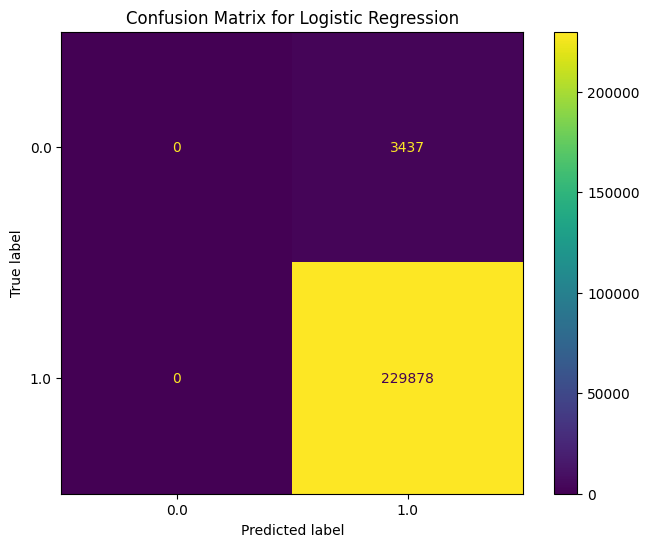

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_prediction_LR), display_labels=grid_search_LR.best_estimator_.classes_)
ax.set(title='Confusion Matrix for Logistic Regression')

display.plot(ax=ax);

Support Vector Machine

In [ ]:
svm = SVC(C=0.01)

In [ ]:
svm.fit(X_train, y_train)

SVC(C=0.01)

In [ ]:
svm.score(X_test, y_test)

0.9852688425519148

In [ ]:
y_prediction_svm = svm.predict(X_test)

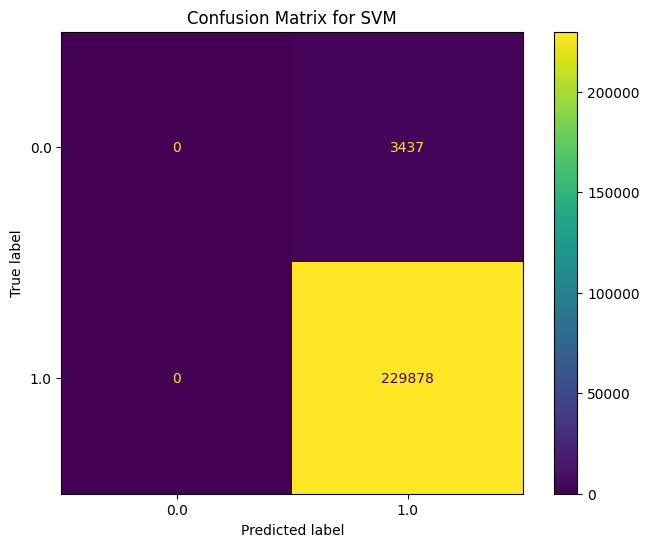

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_prediction_svm), display_labels=svm.classes_)
ax.set(title='Confusion Matrix for SVM')

display.plot(ax=ax);

K Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train, y_train)

0.9865301249081557

In [ ]:
knn.score(X_test, y_test)

0.9849431026723529

In [ ]:
y_prediction_knn = knn.predict(X_test)

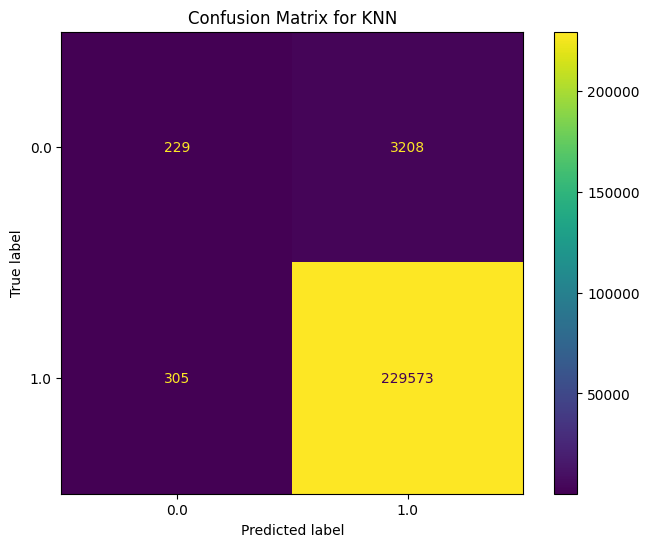

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_prediction_knn), display_labels=knn.classes_)
ax.set(title='Confusion Matrix for KNN')

display.plot(ax=ax)

Naive Bayes

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
clf.score(X_train, y_train)

0.9831888317413666

In [ ]:
clf.score(X_test, y_test)

0.9835458500310739

In [ ]:
y_prediction_clf = clf.predict(X_test)

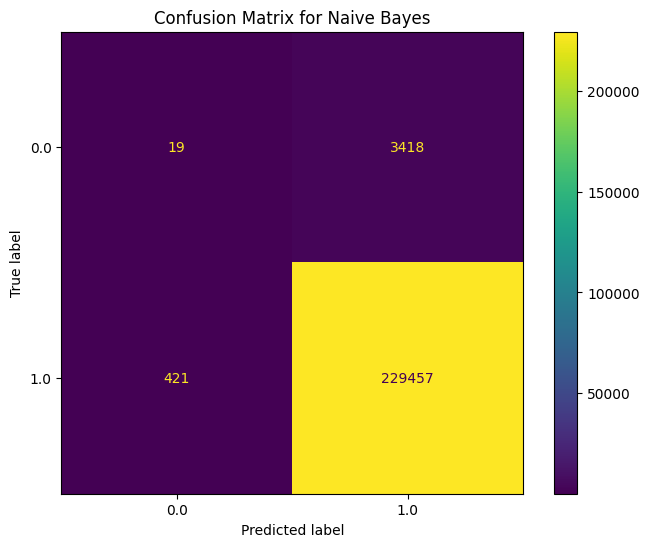

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_prediction_clf), display_labels=clf.classes_)
ax.set(title='Confusion Matrix for Naive Bayes')

display.plot(ax=ax);

DecisionTreeClassifier

In [ ]:
grid_param_tree = {
    'max_depth': list(range(5, 21)),
    "min_samples_leaf": list(range(1, 6))
}

In [ ]:
tree = DecisionTreeClassifier()

grid_search_tree = GridSearchCV(tree, param_grid=grid_param_tree,
                           n_jobs=-1, cv=4, return_train_score=True,
                           scoring='accuracy')

In [ ]:
grid_search_tree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_tree.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5)

In [ ]:
grid_search_tree.best_score_

0.9851524614254225

In [ ]:
grid_search_tree.best_estimator_.score(X_test, y_test)

0.9853459914707584

In [ ]:
y_prediction_tree = grid_search_tree.best_estimator_.predict(X_test)

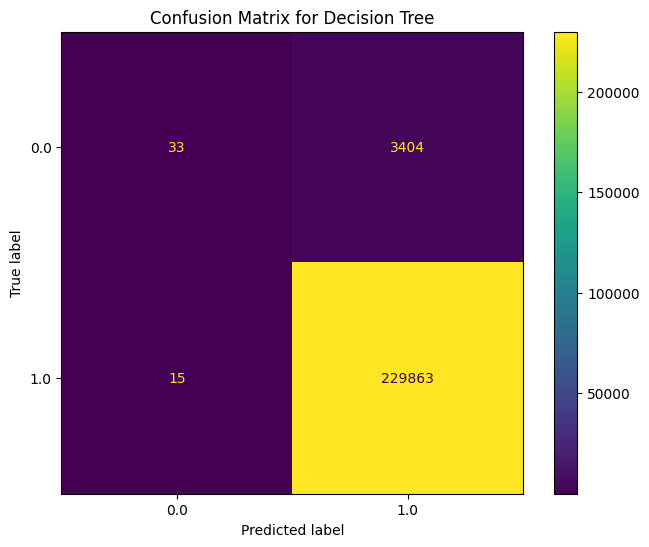

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_prediction_tree), display_labels=grid_search_tree.best_estimator_.classes_)
ax.set(title='Confusion Matrix for Decision Tree')

display.plot(ax=ax);

Сравним все обученные модели.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

In [ ]:
def cross_validation_analtsis(model, X_train, y_train, X_test, y_test):
    scores = cross_validate(model, X_train, y_train, scoring=['accuracy', "recall", "precision", "f1", 'roc_auc'], cv=5)
    scores_test = cross_validate(model, X_test, y_test, scoring=['accuracy', "recall", "precision", "f1", 'roc_auc'], cv=5)

    data_array = np.array([
        scores['test_accuracy'], scores_test['test_accuracy'],
        scores['test_recall'], scores_test['test_recall'],
        scores['test_precision'], scores_test['test_precision'],
        scores['test_f1'], scores_test['test_f1'],
        scores['test_roc_auc'], scores_test['test_roc_auc'],
    ])

    return [np.round(digit, 2) for digit in np.mean(data_array, axis=1)]

In [ ]:
models = [
    grid_search_LR.best_estimator_, knn,
    clf, grid_search_tree.best_estimator_
]

In [ ]:
data_list = []

for model in models:
    data_list.append(cross_validation_analtsis(model, X_train, y_train, X_test, y_test))

data_list = np.array(data_list).T

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
columns_name = ["Log Reg", "KNN", "Naive Bayes", "Decision Tree"]
index_name = [
    'train_accuracy', 'test_accuracy',
    'train_recall', 'test_recall',
    'train_precision', 'test_precision',
    'train_f1', 'test_f1',
    'train_roc_auc', 'test_roc_auc',
]

score_data = pd.DataFrame(data_list, columns=columns_name, index=index_name)
score_data

,Log Reg,KNN,Naive Bayes,Decision Tree
train_accuracy,0.99,0.98,0.98,0.99
test_accuracy,0.99,0.98,0.98,0.99
train_recall,1.00,1.00,1.00,1.00
test_recall,1.00,1.00,1.00,1.00
train_precision,0.99,0.99,0.99,0.99
test_precision,0.99,0.99,0.99,0.99
train_f1,0.99,0.99,0.99,0.99
test_f1,0.99,0.99,0.99,0.99
train_roc_auc,0.49,0.70,0.54,0.59
test_roc_auc,0.48,0.65,0.55,0.58


### Вывод

Таким образом, можно сказать что **метод ближайших соседей** больше подходит для решения данной задачи. Поскольку данные **сильно несбалансированы**(значений 1 гораздо больше, чем значений 0), модели логистической регрессии и SVM просто выдают значение 1, что повышает метрику **accuracy**, однако значение **ROC-AUC** довольно мало.

Для решения задачи с такими несбалансированными данными я бы использовал ансамблевые модели, неплохо было бы сделать синтетические данные, нпример с помощью библиотеки sdv. Кроме того, решение можно свести к поиску аномалий и использовать модули IsolationForest, LocalOutlierFactor из библиотеки sklearn.

P. S.

SVM не добавлен в эту таблицу, потому что эта модель показывает результаты, схожие с логистической регрессией, и, на мой взгляд, не подходит для решения поставленной задачи. Кроме того, SVM довольно долго обучается.